# 2-d Incline Parametric Sweep

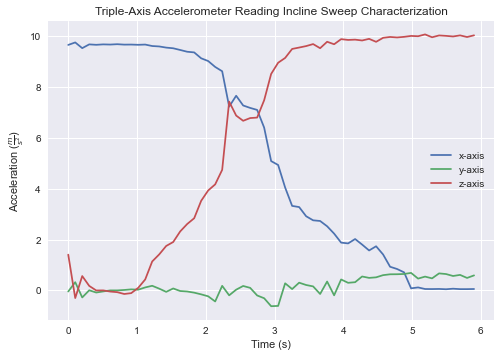

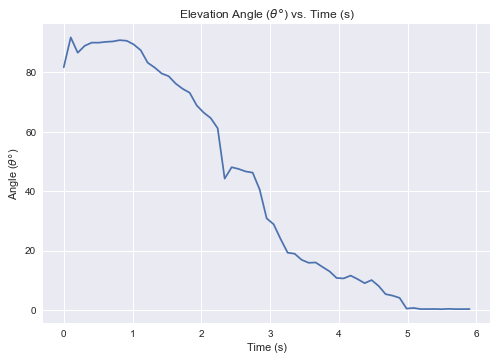

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn")

with open("accdata.csv", "r") as rf:
    d = rf.readlines()
    
x = []
y = []
z = []

for line in d:
    d = line.strip("\n").split(",")
    i = [float(j) for j in d[:len(d)]]
    x.append(i[0])
    y.append(i[1])
    z.append(i[2])
    
x = x[:len(d)-25] # removing points where I was turning off data collection
y = y[:len(d)-25] # removing points where I was turning off data collection
z = z[:len(d)-25] # removing points where I was turning off data collection

n = len(x)
tvals = np.linspace(0, 100e-3*n, n)

plt.figure()
plt.plot(tvals, x, label="x-axis")
plt.plot(tvals, y, label="y-axis")
plt.plot(tvals, z, label="z-axis")
plt.title("Triple-Axis Accelerometer Reading Incline Sweep Characterization")
plt.ylabel(r"Acceleration ($\frac{m}{s^2}$)")
plt.xlabel("Time (s)")
plt.legend()
plt.savefig("triple-axis-charac")
plt.show()

plt.figure()
plt.title(r"Elevation Angle ($\theta \degree$) vs. Time (s)")
plt.ylabel(r"Angle ($\theta \degree$)")
plt.xlabel("Time (s)")

plt.plot(tvals, (np.pi/2-np.arctan(np.divide(z,x)))*180/np.pi)
plt.plot()
plt.savefig("elevation-ang")
plt.show()


# 3-d Parametric Sweep

<ipython-input-2-5cf19e3f2caf>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


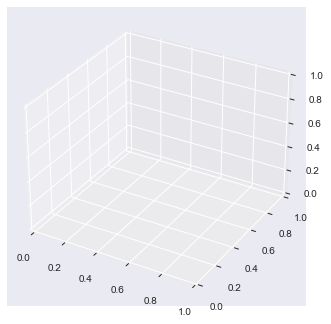

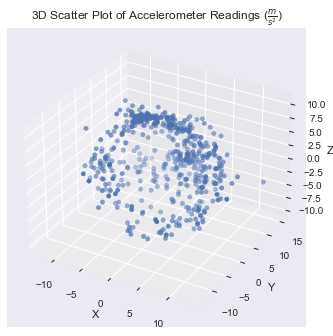

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
plt.style.use("seaborn")

with open("accdata-2.csv", "r") as rf:
    d = rf.readlines()
    
x = []
y = []
z = []

for line in d:
    d = line.strip("\n").split(",")
    i = [float(j) for j in d[:len(d)]]
    x.append(i[0])
    y.append(i[1])
    z.append(i[2])
    
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x, y, z)
plt.title(r"3D Scatter Plot of Accelerometer Readings ($\frac{m}{s^2}$)")

# ax.title("3-D Characterization of Accelerometer")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.savefig("acc-3d")
plt.show()

# Magnetometer

## Law of Large Numbers Analysis

<ipython-input-177-c8168d032ea0>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


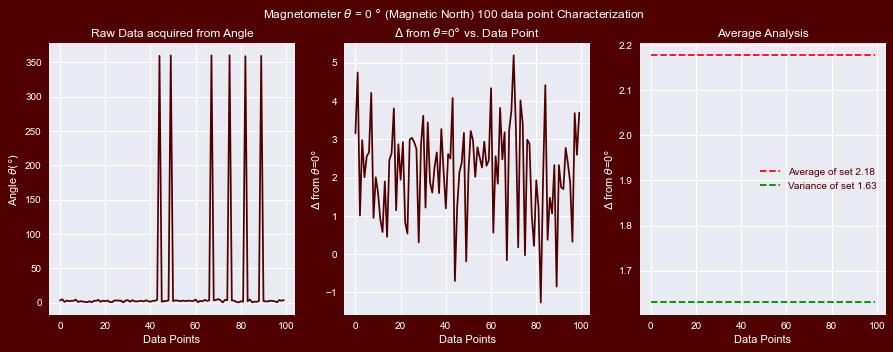

In [177]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from scipy.optimize import curve_fit

plt.style.use("seaborn")
wrapped = []


        
# plt.figure(figsize=(5,5))
# plt.xlabel("Data Points")
# plt.ylabel(r"Angle $\degree$")
# plt.title(r"Magnetometer 0$\degree$ 100 data point Characterization")
# plt.tight_layout()
# plt.plot(z, color="#500000")
# plt.show()
# plt.plot(wrapped, color="#500000")

# create a figure with 4 subplots arranged in a 2x2 grid
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
df = pd.read_csv("d-4.csv")
df['ma5'] = df['angle'].rolling(window=5).mean()

for d in df['angle']:
    if d > 300:
        wrapped.append(d-360)
    else:
        wrapped.append(d)

df['wrapped'] = wrapped
# plot the data on each subplot

axs[0].plot(z, color="#500000")
axs[0].set_xlabel("Data Points", color='white')
axs[0].set_ylabel(r"Angle $\theta (\degree$)", color='white')
axs[0].set_title(r"Raw Data acquired from Angle", color='white')

axs[1].set_title('Raw Data',  color='white')
axs[1].plot(wrapped, color="#500000")
axs[1].set_xlabel("Data Points", color='white')
axs[1].set_ylabel(r'$\Delta$ from $\theta$=0$\degree$', color='white')
axs[1].set_title(r'$\Delta$ from $\theta$=0$\degree$ vs. Data Point',  color='white')


data = [df['wrapped'].mean()]*len(df.index)
data2 = [df['wrapped'].var()]*len(df.index)
axs[2].set_title('Statistical Parameters',  color='white')
axs[2].plot(data, '--', color="r", label=f'Average of set {round(data[0],2)}')
axs[2].plot(data2, '--', color="g", label=f'Variance of set {round(data2[0],2)}')
axs[2].set_xlabel("Data Points", color='white')
axs[2].set_ylabel(r'$\Delta$ from $\theta$=0$\degree$', color='white')
axs[2].set_title(r'Average Analysis', color='white')
axs[2].legend(loc='best', facecolor='#500000', edgecolor='white', labelcolor='#500000')

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# axs[0].plot(df['wrapped'].rolling(window=10).var(), color="#500000")
# axs[0].set_xlabel("Data Points", color='white')
# axs[0].set_ylabel(r'$\delta$ from $\theta$=0$\degree', color='white')
# axs[0].set_title(r'$\delta$ from $\theta$=0$\degree', color='white')
# axs[1].plot(df['wrapped'].rolling(window=10).mean(), color="#500000")
# axs[1].set_xlabel("Data Points", color='white')
# axs[1].set_ylabel(r'Angle with $\theta = $\degree$', color='white')
# axs[1].set_title(r'Rolling Average with T = 10 data points ', color='white')

fig.set_facecolor('#500000')
fig.suptitle(r'Steps to System Improvement Analysis', color='white')
#set the color of the ticks and labels to white
for ax in axs.flatten():
    ax.tick_params(colors='white')


# change the background color of the plot
fig.set_facecolor('#500000')

# # set the color of the ticks and labels to white
# for ax in axs.flatten():
#     ax.tick_params(colors='white')

# # add a title for the entire figure
fig.suptitle(r'Magnetometer $\theta$ = 0 $\degree$ (Magnetic North) 100 data point Characterization', color='white')
plt.savefig('t')
